<a href="https://colab.research.google.com/github/Sivaramjallu001/Digit-Recognizer/blob/main/Stolen_Vehicle_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install ultralytics


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 47.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 82.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 74.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 45.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 30.2 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling 

In [4]:
!unzip -q "/content/License Plate Recognition.v11i.yolov8.zip" -d .


In [5]:
!yolo task=detect mode=train model=yolov8n.pt data=/content/data.yaml epochs= 20 imgsz=640 batch=16 device=0

100% 6.25M/6.25M [00:00<00:00, 324MB/s]
Ultralytics 8.3.120 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/data.yaml, epochs=20, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True,

In [6]:
from google.colab import files
files.download('runs/detect/train/weights/best.pt')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [7]:
from ultralytics import YOLO
model = YOLO('best.pt')

In [8]:
from google.colab import files
uploaded = files.upload()


Saving 624783.jpg to 624783.jpg


In [9]:

# Run prediction (replace 'car.jpg' or 'toll.mp4' with your file name)
results = model.predict(source='624783.jpg', save=True, conf=0.5)



image 1/1 /content/624783.jpg: 384x640 1 License_Plate, 42.0ms
Speed: 3.1ms preprocess, 42.0ms inference, 171.5ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/detect/predict


In [11]:
pip install easyocr opencv-python

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 72.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 422.8/422.8 kB 35.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 969.6/969.6 kB 62.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 292.9/292.9 kB 28.5 MB/s eta 0:00:00


In [13]:
from ultralytics import YOLO
import cv2

# Load trained model (change path if different)
model = YOLO('/content/runs/detect/train/weights/best.pt')

# Load an image (can be a frame from video too)
image_path = '/content/624783.jpg'
img = cv2.imread(image_path)

# Run prediction
results = model(image_path)[0]  # get the first result



image 1/1 /content/624783.jpg: 384x640 1 License_Plate, 9.0ms
Speed: 2.7ms preprocess, 9.0ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


In [14]:
# Loop through detected boxes
for box in results.boxes:
    x1, y1, x2, y2 = map(int, box.xyxy[0])  # bounding box
    conf = float(box.conf[0])               # confidence score
    cls = int(box.cls[0])                   # class index

    print(f"Class: {cls}, Confidence: {conf:.2f}, BBox: {x1, y1, x2, y2}")

    # Draw bounding box
    cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
    cv2.putText(img, f"Plate {conf:.2f}", (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)

    # Crop the detected license plate
    plate_crop = img[y1:y2, x1:x2]
    cv2.imwrite('cropped_plate.jpg', plate_crop)


Class: 0, Confidence: 0.71, BBox: (2680, 1160, 3112, 1317)


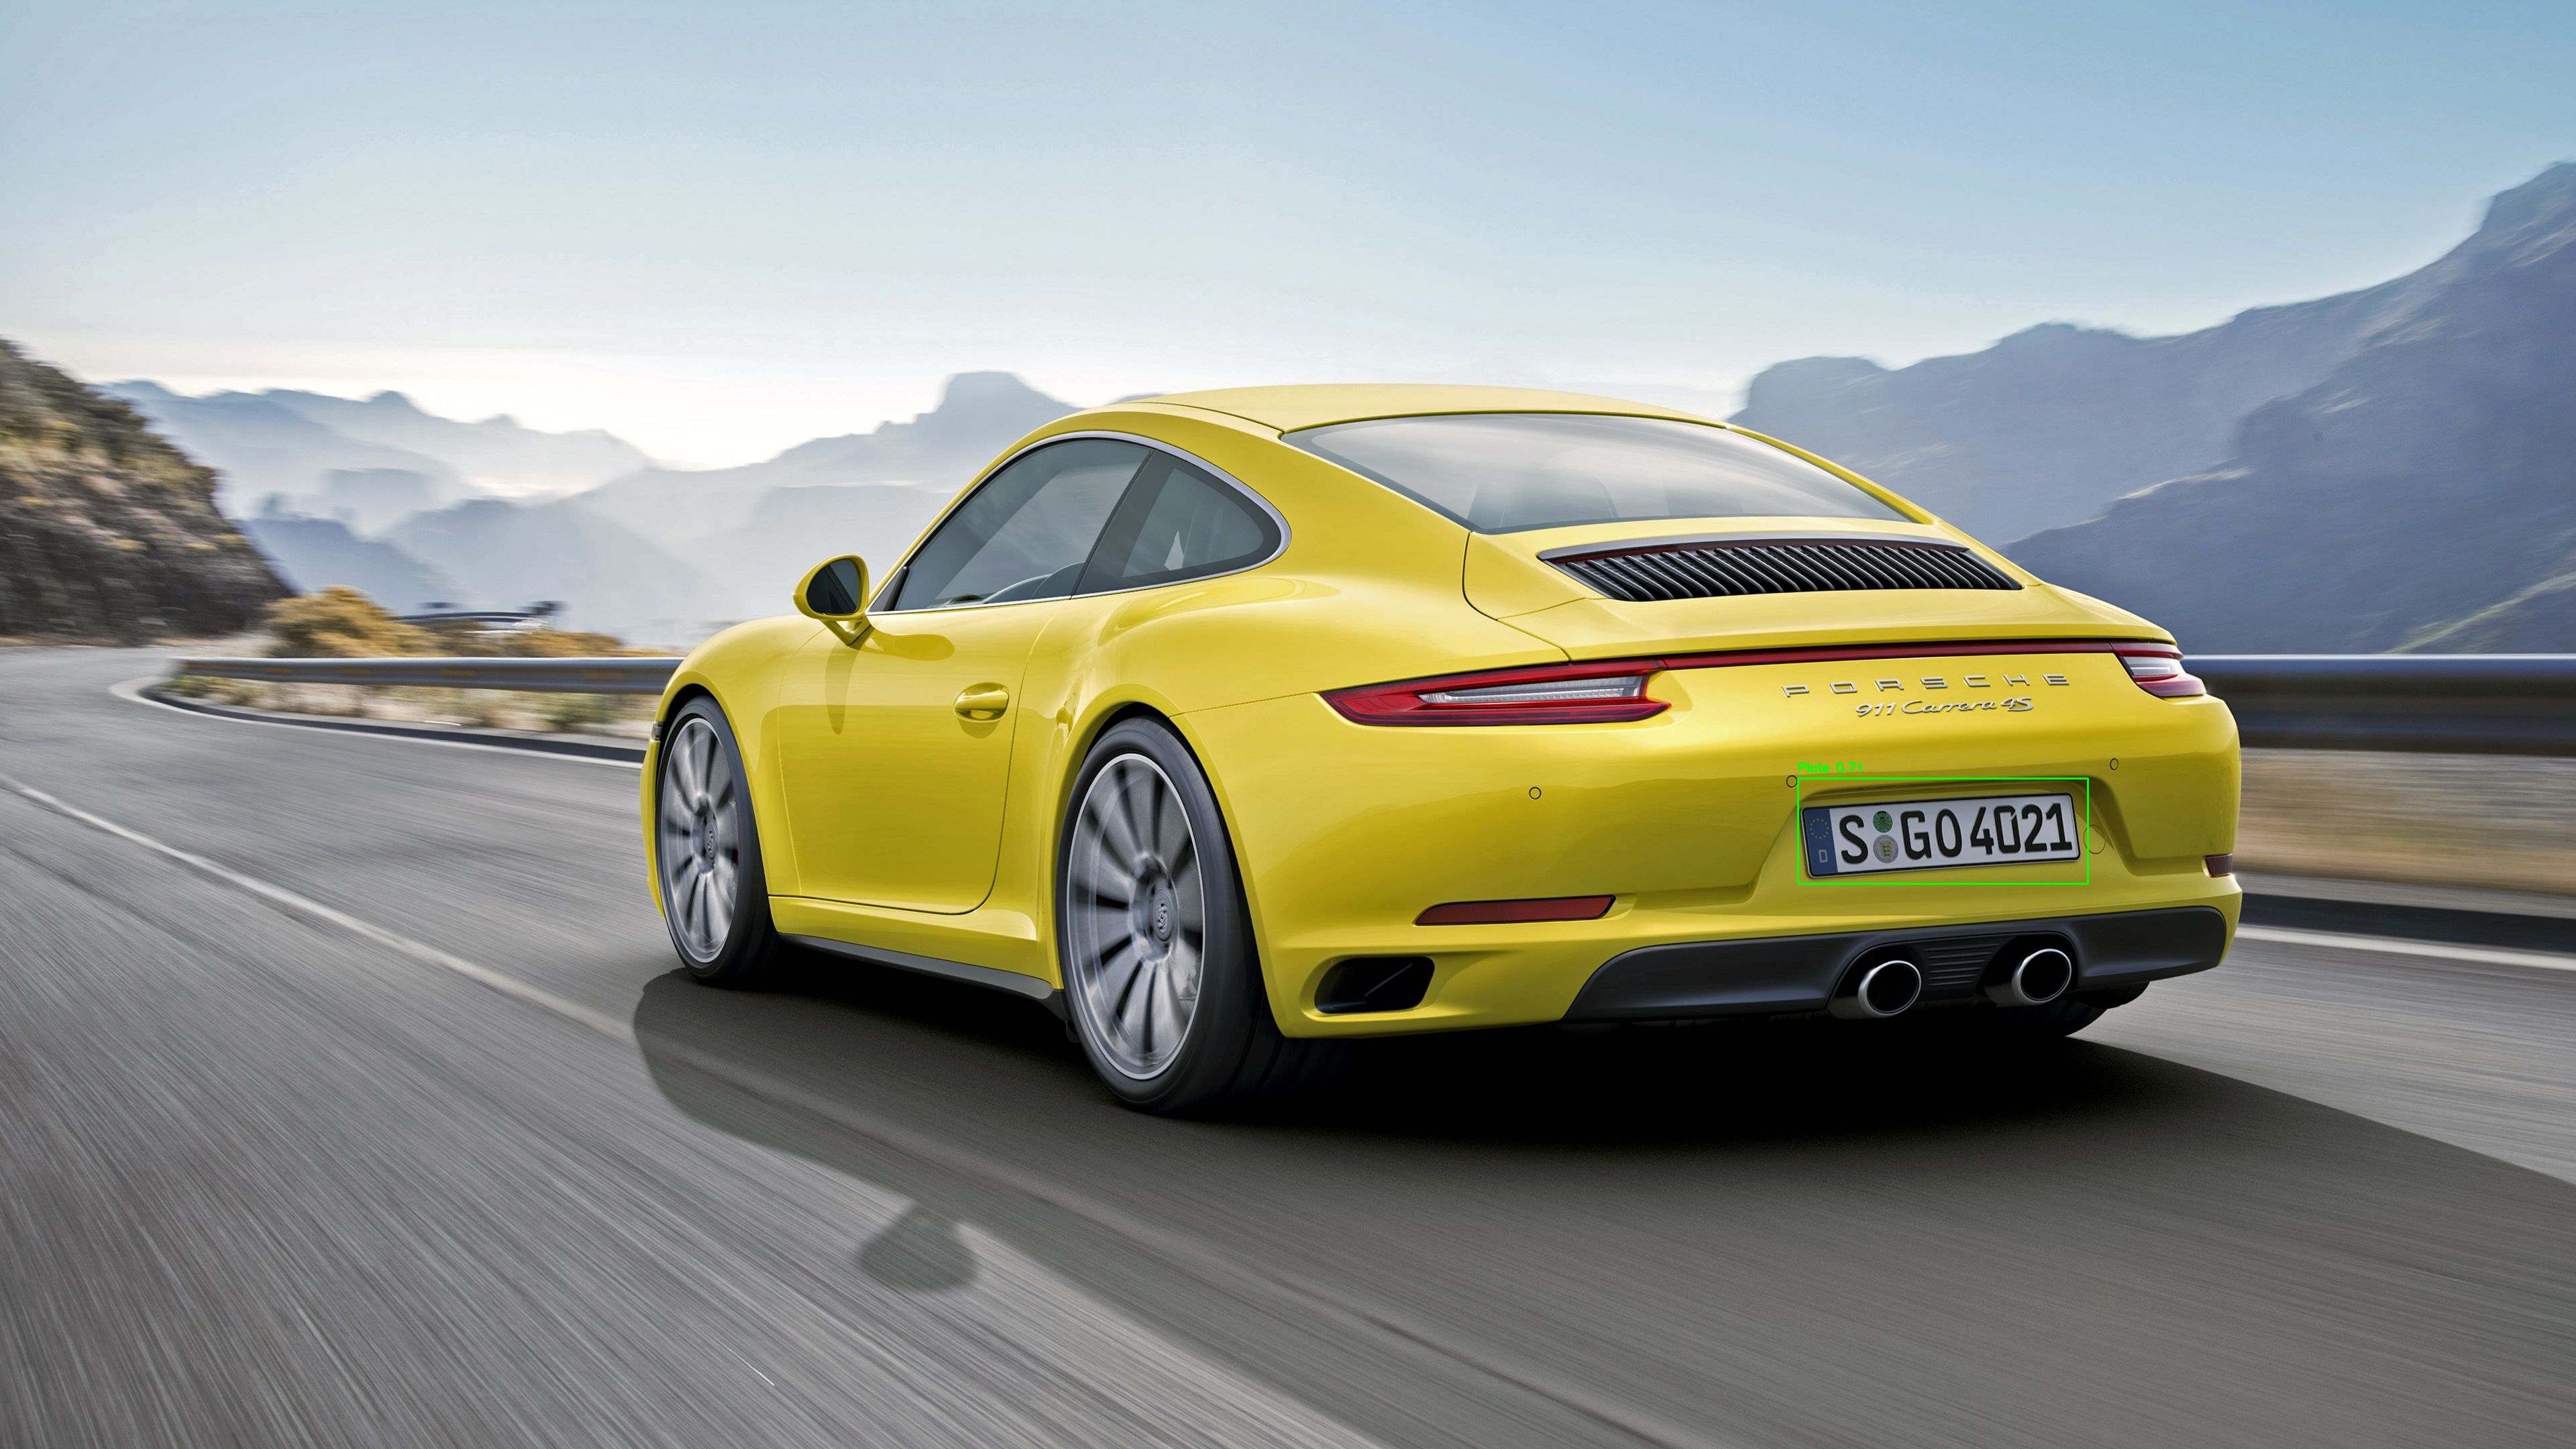

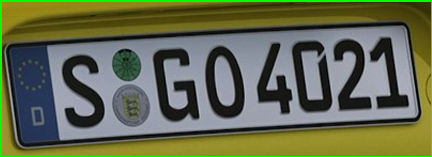

In [16]:
from google.colab.patches import cv2_imshow

# Show the full image with detection
cv2_imshow(img)

# Show the cropped license plate
cv2_imshow(plate_crop)



In [17]:
!pip install easyocr


In [18]:
import easyocr

# Initialize EasyOCR Reader (English only)
reader = easyocr.Reader(['en'])


In [22]:
# Run OCR on the cropped license plate
results = reader.readtext(plate_crop)
print(results)

# Display results
for bbox, text, conf in results:
    print(f"Detected Text: {text}, Confidence: {conf:.2f}")


[([[np.int32(58), np.int32(50)], [np.int32(106), np.int32(50)], [np.int32(106), np.int32(128)], [np.int32(58), np.int32(128)]], 'S', np.float64(0.8296054637037429)), ([[np.int32(142), np.int32(17)], [np.int32(426), np.int32(17)], [np.int32(426), np.int32(142)], [np.int32(142), np.int32(142)]], '00421', np.float64(0.4672824372044429))]
Detected Text: S, Confidence: 0.83
Detected Text: 00421, Confidence: 0.47


In [23]:
import re

# Combine all detected text pieces
full_text = " ".join([text for _, text, conf in results if conf > 0.4])
clean_text = re.sub(r'[^A-Z0-9]', '', full_text.upper())

print(f"[CLEANED] License Plate Text: {clean_text}")


[CLEANED] License Plate Text: S00421
